The fall time for the object weapons.bombs.Mk_82 from an altitude of 18000.0 feet at a speed of 350.0 CAS is 68.63 seconds.
The distance the bomb will travel is 16505.25 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 18000.0 feet at a speed of 450.0 CAS is 68.63 seconds.
The distance the bomb will travel is 9563.1 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 22000.0 feet at a speed of 350.0 CAS is 77.88 seconds.
The distance the bomb will travel is 7537.77 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 22000.0 feet at a speed of 450.0 CAS is 77.88 seconds.
The distance the bomb will travel is 5685.73 feet.


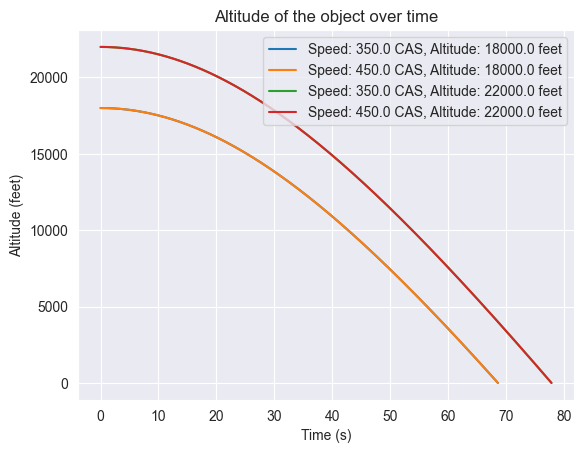

The fall time for the object weapons.bombs.Mk_82 from an altitude of 18000.0 feet at a speed of 350.0 CAS is 68.63 seconds.
The distance the bomb will travel is 19659.65 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 18000.0 feet at a speed of 450.0 CAS is 68.63 seconds.
The distance the bomb will travel is 10507.01 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 22000.0 feet at a speed of 350.0 CAS is 77.88 seconds.
The distance the bomb will travel is 8036.16 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 22000.0 feet at a speed of 450.0 CAS is 77.88 seconds.
The distance the bomb will travel is 5963.56 feet.


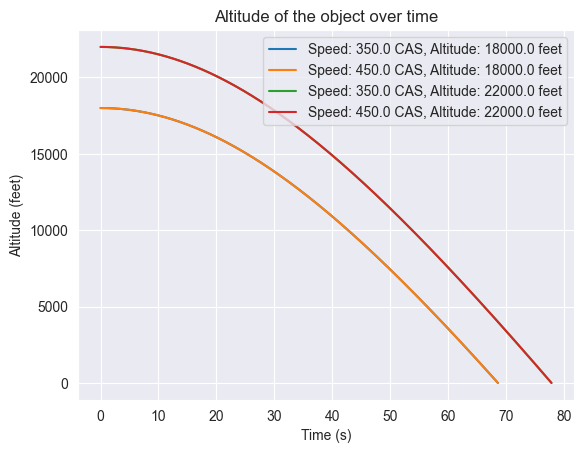

In [18]:
#This is a program that calculates the fall time and distance of a bomb dropped from a plane at a given altitude and speed. FOR A VIDEO GAME. the program reads data from a CSV file containing information about different objects and their properties, such as mass, caliber (because of limitations with data gathering caliber is being used to calculate drag coefficient). The program then uses the Euler method to solve the equation of motion for the object and calculates the fall time and distance for the given altitude and speed. This program also plots the altitude of the object over time to visualize the fall trajectory.
import math
import pandas as pd
import matplotlib.pyplot as plt

def get_user_inputs():
    speeds = []
    altitudes = []

    num_speeds = int(input("Enter the number of speeds: "))
    for i in range(num_speeds):
        speed = float(input(f"Enter the speed of the plane CAS: {i+1}"))
        speeds.append(speed)

    num_altitudes = int(input("Enter the number of altitudes: "))
    for i in range(num_altitudes):
        altitude = float(input(f"Enter altitude {i+1} (in feet): "))
        altitudes.append(altitude)

    return speeds, altitudes

def calculate_fall_time_and_distance(file_path, speeds, altitudes):
    # Constants
    g = 9.8  # m/s^2, acceleration due to gravity
    p = 1.225  # kg/m^3, air density at sea level

    # User inputs
    object_name = input("Enter the name of the object: ")

    # Read the CSV file
    data = pd.read_csv(file_path)

    # Find the object in the CSV file
    object_data = data[data['name'] == object_name]

    if object_data.empty:
        print(f"No data found for object: {object_name}")
        return

    # Calculate the fall time for the object
    m = object_data['mass'].values[0]  # mass in kg
    caliber = object_data['caliber'].values[0]  # caliber in meters
    A = math.pi * (caliber / 2) ** 2  # cross-sectional area in m^2
    Cd = object_data['caliber'].values[0]

    for plane_speed in speeds:
        for release_altitude_feet in altitudes:
            for plane_speed_const in speeds:
                

                release_altitude = release_altitude_feet
                initial_plane_speed = plane_speed
                first_speed = plane_speed_const

                # Initial conditions
                v = 0  # start at rest
                h = release_altitude  # start at release altitude
                t = 0  # start at time 0
                dt = 0.01  # time step
                s = 0  # start at position 0

                time_values = []
                altitude_values = []

                # Euler method to solve the equation of motion
                while h > 0:
                    drag_force = 0.5 * p * v**2 * Cd * A
                    acceleration = g - drag_force / m
                    v += acceleration * dt
                    h -= v * dt
                    t += dt

                    # Update horizontal speed and position
                    drag_force_horizontal = 0.5 * p * plane_speed**2 * Cd * A
                    plane_speed -= drag_force_horizontal / m * dt
                    s += plane_speed * dt

                    # Store the values for plotting
                    time_values.append(t)
                    altitude_values.append(h)

                print(f"The fall time for the object {object_name} from an altitude of {round(release_altitude_feet, 2)} feet at a speed of {round(first_speed, 2)} CAS is {round(t, 2)} seconds.")
                print(f"The distance the bomb will travel is {round(s, 2)} feet.")

                # Plot altitude over time
                plt.plot(time_values, altitude_values, label=f'Speed: {round(first_speed, 2)} CAS, Altitude: {round(release_altitude_feet, 2)} feet')

        # Move the legend to the upper right corner
        plt.legend(loc='upper right')

        plt.xlabel('Time (s)')
        plt.ylabel('Altitude (feet)')
        plt.title('Altitude of the object over time')
        plt.show()
# Replace 'your_file.csv' with your actual csv file path
# Replace 'plane_speed' with the actual speed of the plane in m/s
speeds, altitudes = get_user_inputs()
calculate_fall_time_and_distance('...weapon_data.csv', speeds, altitudes)